# Life Expectancy Prediction

## Importing the libraries

In [3]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data

In [16]:
df = pd.read_csv("data/raw/Life Expectancy Data.csv")
df.sample(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1553,Luxembourg,2000,Developed,77.8,98.0,0,13.14,8246.130437,77.0,0,...,99.0,7.48,99.0,0.1,48735.995490,4363.0,1.0,1.0,0.848,13.5
2028,Philippines,2010,Developing,67.9,218.0,58,4.85,198.256379,77.0,6368,...,78.0,4.37,79.0,0.1,2129.499242,93726624.0,1.0,9.7,0.662,11.4
1584,Malawi,2001,Developing,43.5,599.0,48,1.15,12.797606,NaN,150,...,86.0,5.70,9.0,25.1,146.761540,11695863.0,7.9,7.7,0.387,10.1
2652,Trinidad and Tobago,2012,Developing,78.0,174.0,0,6.70,1486.236406,92.0,0,...,91.0,5.78,92.0,0.4,19152.531000,1341588.0,5.9,6.1,0.772,12.6
1148,Honduras,2005,Developing,72.5,163.0,5,3.23,203.713488,97.0,0,...,98.0,7.81,98.0,0.9,1311.741714,737343.0,2.5,2.4,0.577,10.6


# Life Expectancy Data

## About the Data

This dataset contains information about life expectancy, health factors, and economic indicators for various countries over several years. Below is a description of each column in the dataset:

1. **Country**: The name of the country.
2. **Year**: The year the data was recorded.
3. **Status**: The development status of the country (Developed/Developing).
4. **Life expectancy**: The average number of years a newborn is expected to live.
5. **Adult Mortality**: The number of adult deaths per 1000 population aged 15-60.
6. **infant deaths**: The number of infant deaths per 1000 live births.
7. **Alcohol**: The per capita (15+) alcohol consumption in litres of pure alcohol.
8. **percentage expenditure**: Expenditure on health as a percentage of GDP.
9. **Hepatitis B**: The percentage of 1-year-old children immunized against Hepatitis B.
10. **Measles**: The number of reported cases of measles per 1000 population.
11. **BMI**: The average Body Mass Index of the population.
12. **under-five deaths**: The number of deaths of children under 5 years per 1000 live births.
13. **Polio**: The percentage of 1-year-old children immunized against Polio.
14. **Total expenditure**: The total expenditure on health as a percentage of GDP.
15. **Diphtheria**: The percentage of 1-year-old children immunized against Diphtheria.
16. **HIV/AIDS**: The number of deaths due to HIV/AIDS per 1000 live births.
17. **GDP**: The Gross Domestic Product per capita (in USD).
18. **Population**: The population of the country.
19. **thinness 1-19 years**: The prevalence of thinness among children and adolescents aged 1-19 years.
20. **thinness 5-9 years**: The prevalence of thinness among children aged 5-9 years.
21. **Income composition of resources**: The Human Development Index in terms of income composition.
22. **Schooling**: The number of years of schooling.

This dataset can be used to analyze the factors affecting life expectancy and to identify trends and patterns in health and economic indicators across different countries and years.

## EDA



In [7]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [9]:
# Checking the number of columnns dtypes
df.dtypes.value_counts()

float64    16
int64       4
object      2
Name: count, dtype: int64

In [34]:
# Descriptive statistics in a colrful manner
df.describe().T.round(2).style.background_gradient(cmap='viridis')

,count,mean,std,min,25%,50%,75%,max
Year,2938.000000,2007.520000,4.610000,2000.000000,2004.000000,2008.000000,2012.000000,2015.000000
Life expectancy,2928.000000,69.220000,9.520000,36.300000,63.100000,72.100000,75.700000,89.000000
Adult Mortality,2928.000000,164.800000,124.290000,1.000000,74.000000,144.000000,228.000000,723.000000
infant deaths,2938.000000,30.300000,117.930000,0.000000,0.000000,3.000000,22.000000,1800.000000
Alcohol,2744.000000,4.600000,4.050000,0.010000,0.880000,3.760000,7.700000,17.870000
percentage expenditure,2938.000000,738.250000,1987.910000,0.000000,4.690000,64.910000,441.530000,19479.910000
Hepatitis B,2385.000000,80.940000,25.070000,1.000000,77.000000,92.000000,97.000000,99.000000
Measles,2938.000000,2419.590000,11467.270000,0.000000,0.000000,17.000000,360.250000,212183.000000
BMI,2904.000000,38.320000,20.040000,1.000000,19.300000,43.500000,56.200000,87.300000
under-five deaths,2938.000000,42.040000,160.450000,0.000000,0.000000,4.000000,28.000000,2500.000000


In [17]:
# Checking for missing values in percentage upto 2 decimal places having more than 0% missing values

(df.isnull().sum().sort_values(ascending=False)/len(df)*100).round(2)



Population                         22.19
Hepatitis B                        18.82
GDP                                15.25
Total expenditure                   7.69
Alcohol                             6.60
Income composition of resources     5.68
Schooling                           5.55
 thinness  1-19 years               1.16
 thinness 5-9 years                 1.16
 BMI                                1.16
Diphtheria                          0.65
Polio                               0.65
Life expectancy                     0.34
Adult Mortality                     0.34
infant deaths                       0.00
Status                              0.00
Country                             0.00
Year                                0.00
under-five deaths                   0.00
Measles                             0.00
percentage expenditure              0.00
 HIV/AIDS                           0.00
dtype: float64

The Population ,Hepatitis B and GDP are missing at higher percentage in the data.

Since the missing value in population column is around 22% of the total data, we can't drop the rows as it will lead to loss of data. So, we will fill the missing values with the mean of the column countrywise.
If the whole country does not have population data, we will fill the missing values with the mean of the column based on Status of the country.

In [13]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,NaN,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,NaN,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,NaN,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,NaN,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,NaN,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,NaN,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,NaN,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,NaN,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,NaN,1.6,1.7,0.427,9.8


In [6]:
df.groupby("Country")["Population"].transform("mean")

0       9.972260e+06
1       9.972260e+06
2       9.972260e+06
3       9.972260e+06
4       9.972260e+06
            ...     
2933    8.021343e+06
2934    8.021343e+06
2935    8.021343e+06
2936    8.021343e+06
2937    8.021343e+06
Name: Population, Length: 2938, dtype: float64

In [18]:
# Fill the population missiiing values with the mean of the population countrywise
df['Population'] = df.groupby('Country')['Population'].transform(lambda x: x.fillna(x.mean()))


In [20]:
df["Population"].isnull().sum()
# Fill the population missing values with the mean of the population Statusswise

df['Population'] = df.groupby('Status')['Population'].transform(lambda x: x.fillna(x.mean()))

In [21]:
df["Population"].isnull().sum()

np.int64(0)

In [23]:
# Following same procedure for Hepatitis B
df["Hepatitis B"] = df.groupby("Country")["Hepatitis B"].transform(lambda x: x.fillna(x.mean()))
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        144
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                           0
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [26]:
df["Hepatitis B"] = df.groupby("Status")["Hepatitis B"].transform(lambda x: x.fillna(x.mean()))
df["Hepatitis B"].isnull().sum()

np.int64(0)

In [27]:
df["GDP"] = df.groupby("Country")["GDP"].transform(lambda x: x.fillna(x.mean()))
df["GDP"] = df.groupby("Status")["GDP"].transform(lambda x: x.fillna(x.mean()))
df["GDP"].isnull().sum()

np.int64(0)

In [31]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df.groupby("Country")[col].transform(lambda x: x.fillna(x.mean()))
    df[col] = df.groupby("Status")[col].transform(lambda x: x.fillna(x.mean()))

In [32]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [56]:
# Checking for the % of population data missing by each country
country_df=df[["Country","Population","Year"]]

# Checking for the % of population data missing by each country
country_df.groupby("Country").Population.apply(lambda x: (x.isnull().sum()/len(x)*100).round(2)).sort_values(ascending=False)

Country
Antigua and Barbuda    100.0
Dominica               100.0
Barbados               100.0
Bahrain                100.0
Bahamas                100.0
                       ...  
Uruguay                  0.0
Vanuatu                  0.0
Uzbekistan               0.0
Zambia                   0.0
Zimbabwe                 0.0
Name: Population, Length: 193, dtype: float64

<Axes: >

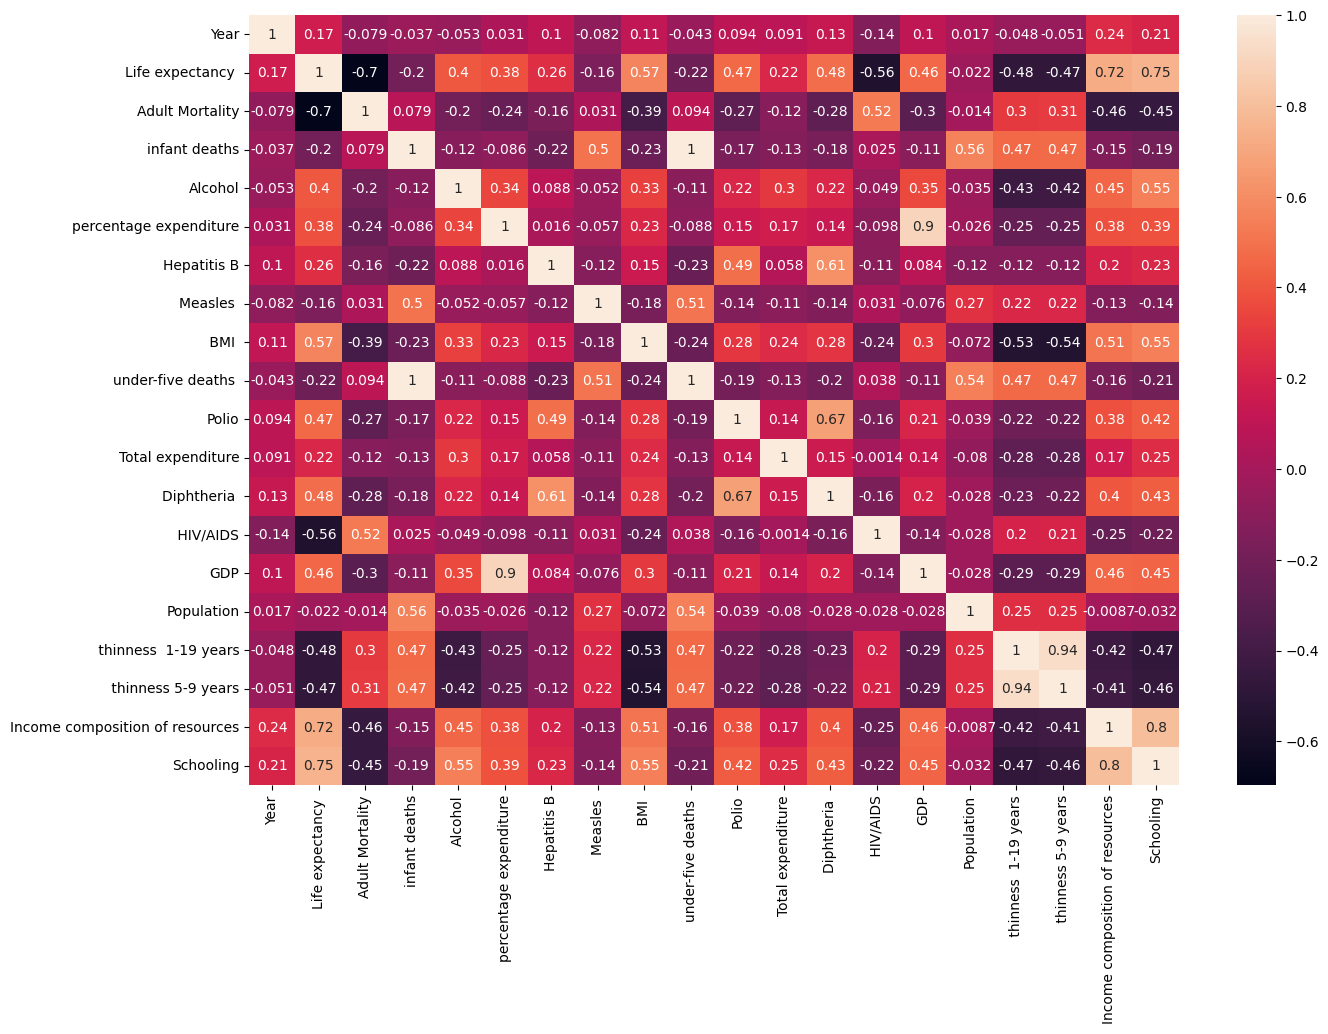

In [60]:
# Plotting correlation matrix for numerical columns
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True)

In [38]:
# checking for duplicate values
df.duplicated().sum()

np.int64(0)

In [39]:
# Checking for object columns
df.select_dtypes(include=['object']).columns

Index(['Country', 'Status'], dtype='object')

In [40]:
# Checking for unique values in object columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col} has {df[col].nunique()} unique values")

Country has 193 unique values
Status has 2 unique values


In [42]:
df["Country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

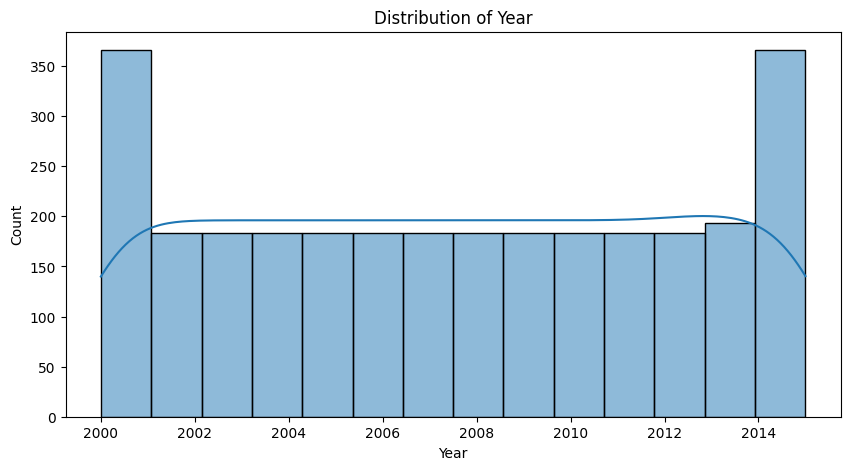

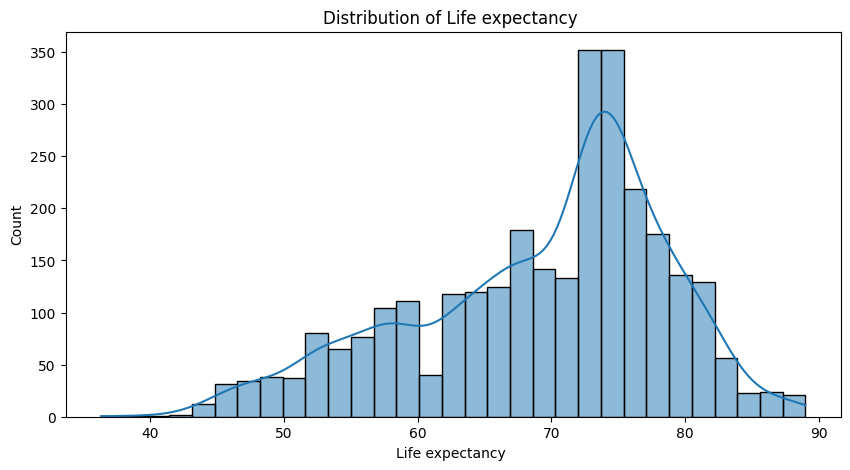

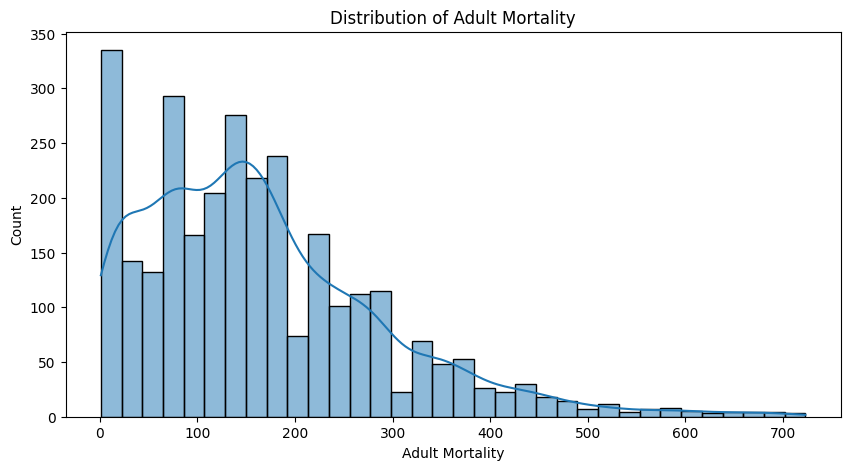

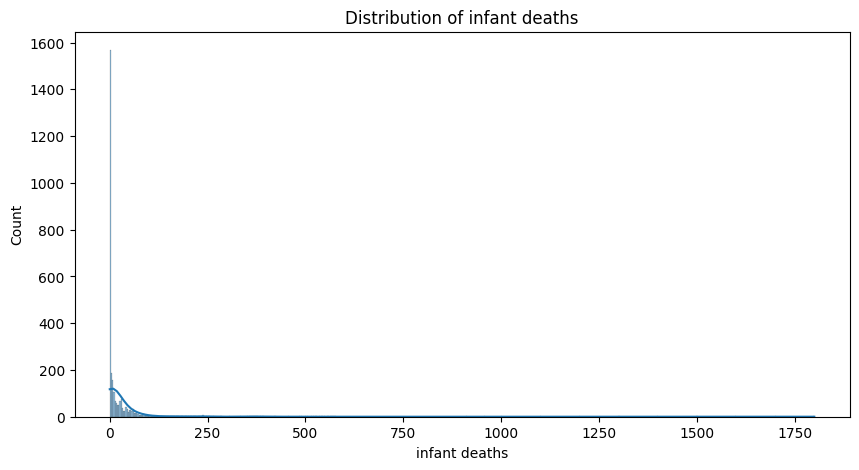

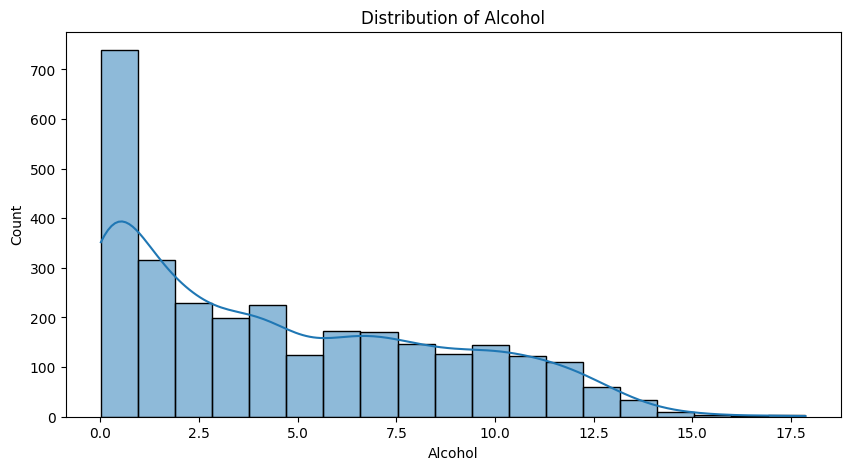

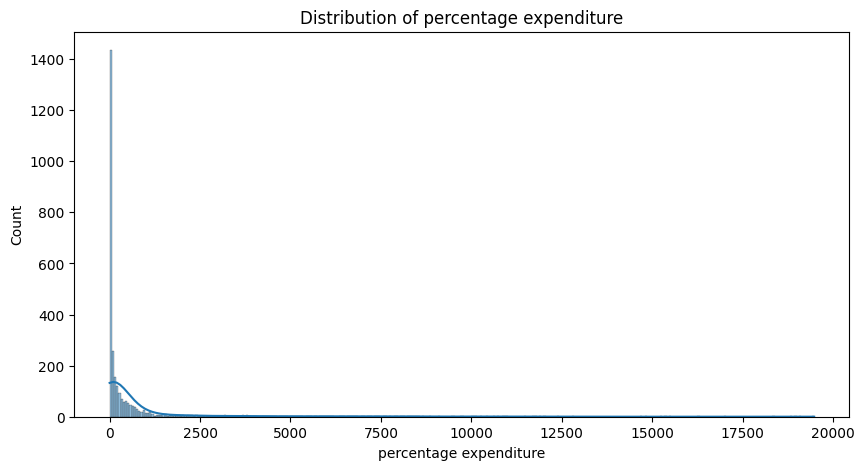

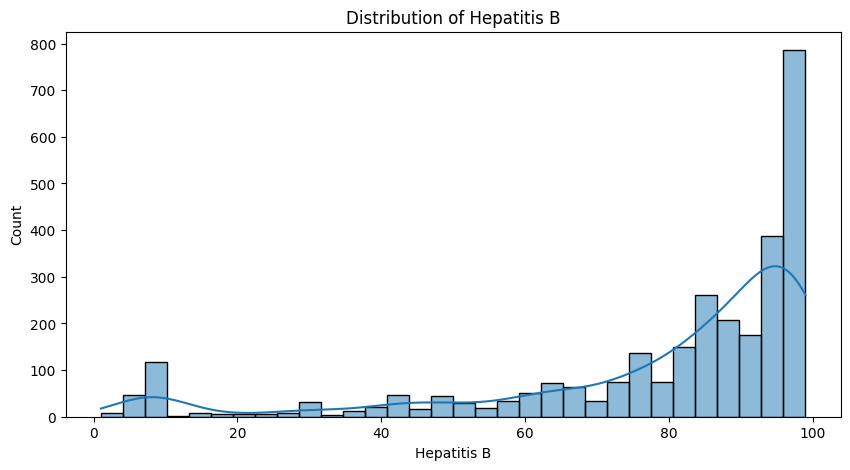

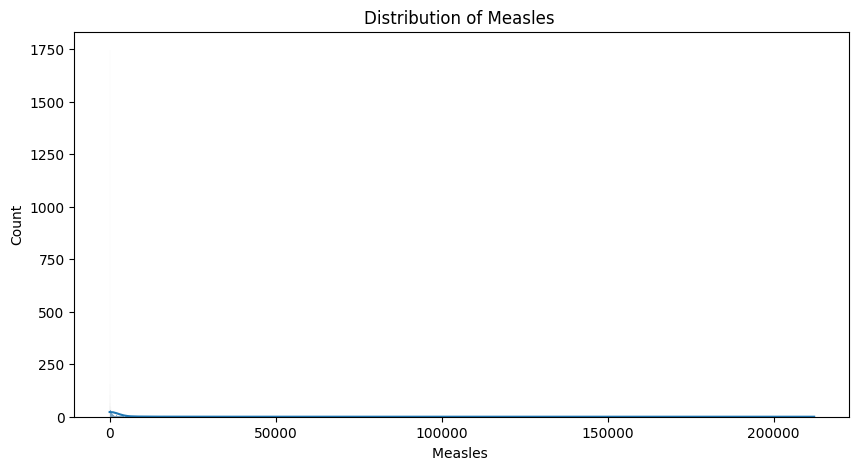

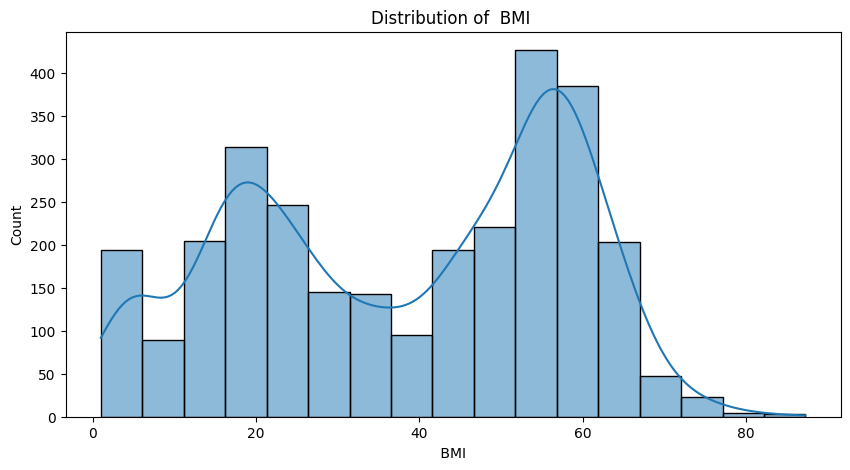

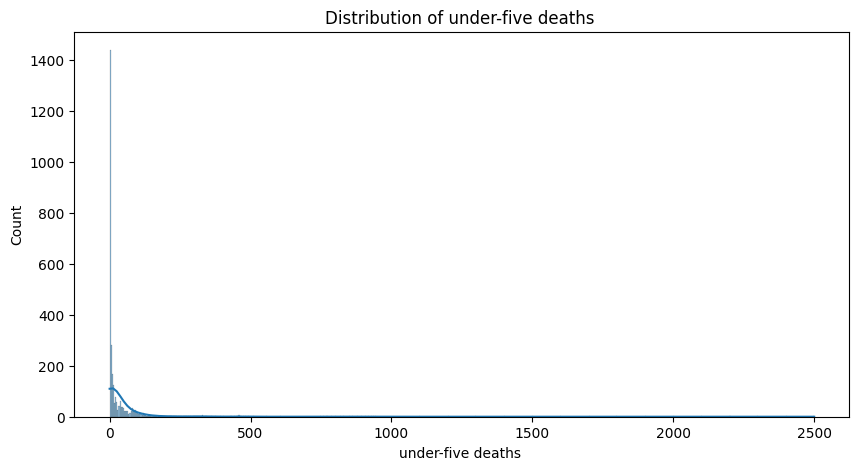

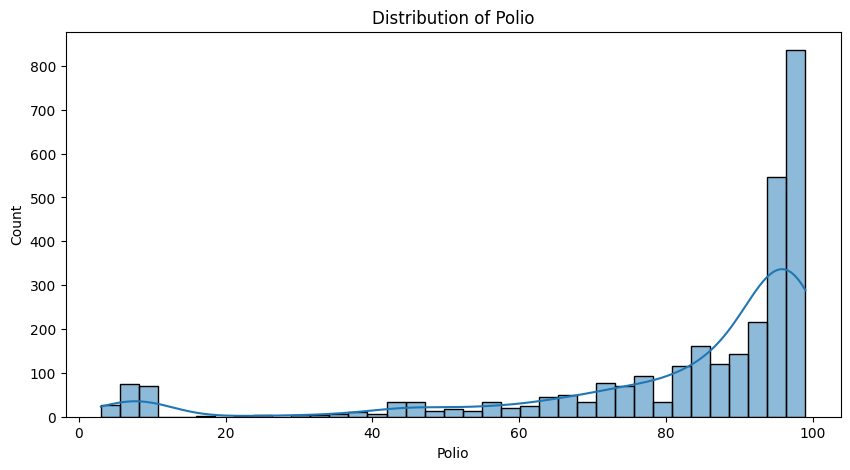

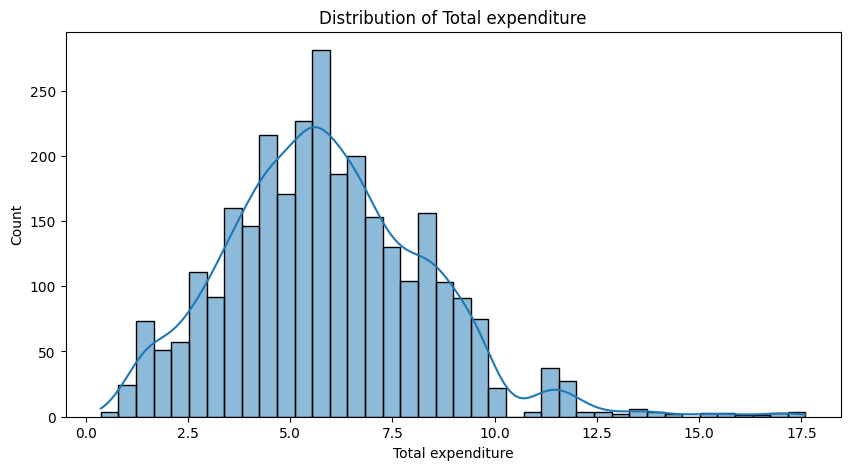

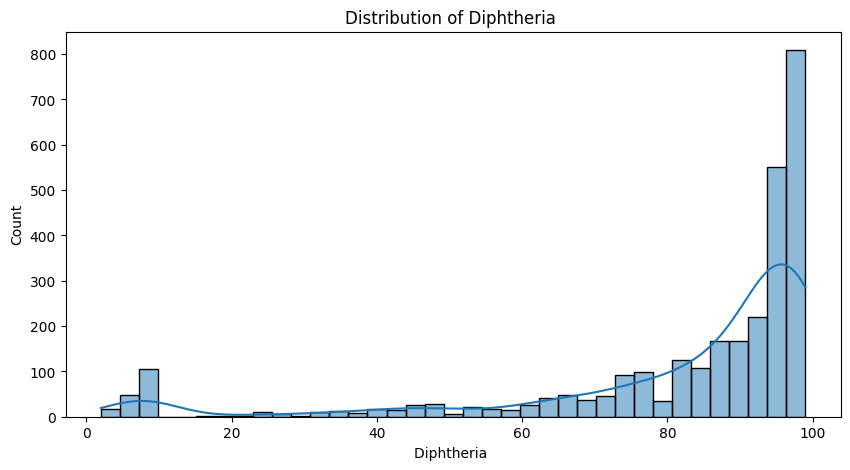

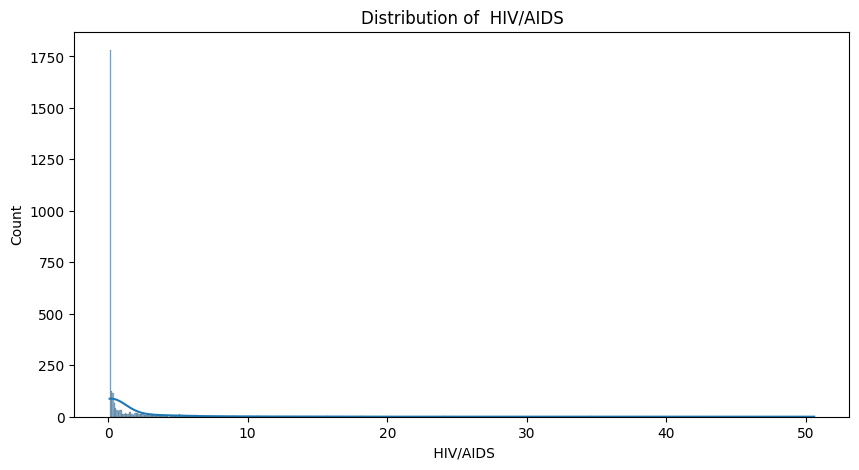

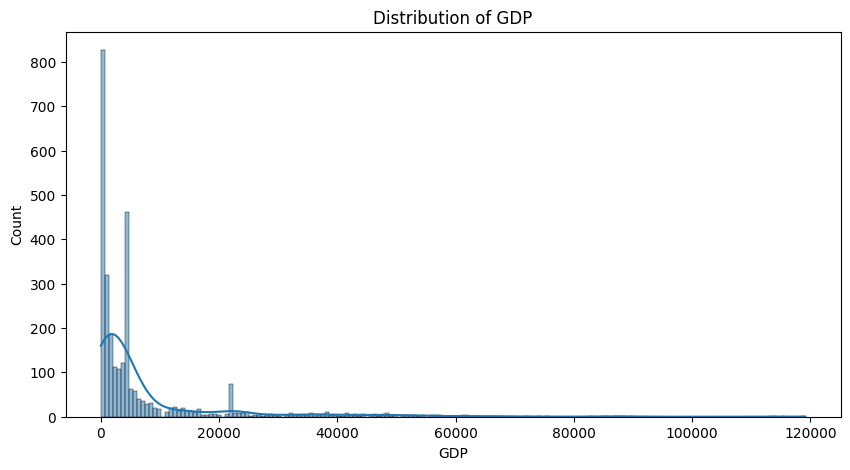

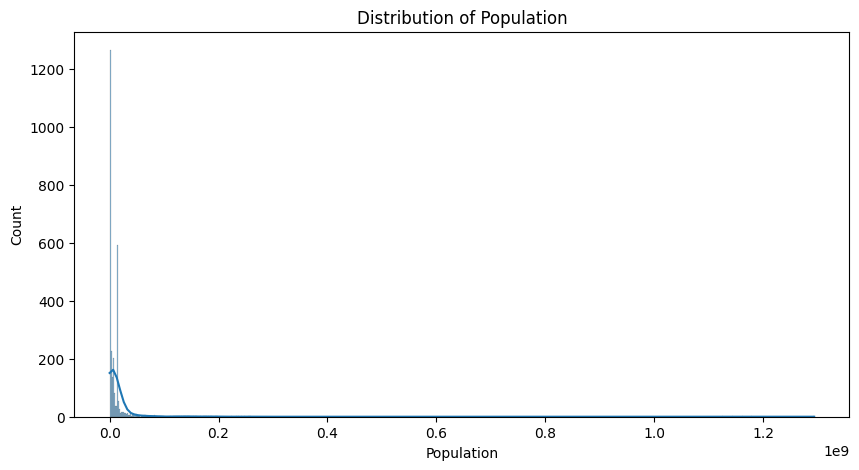

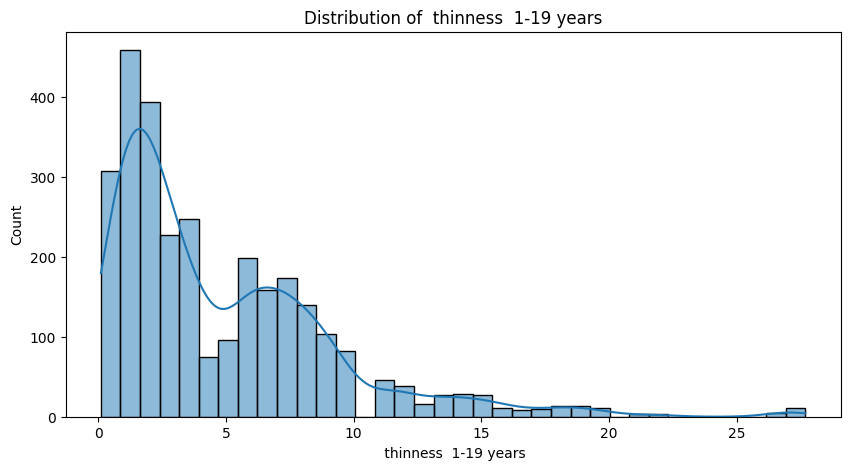

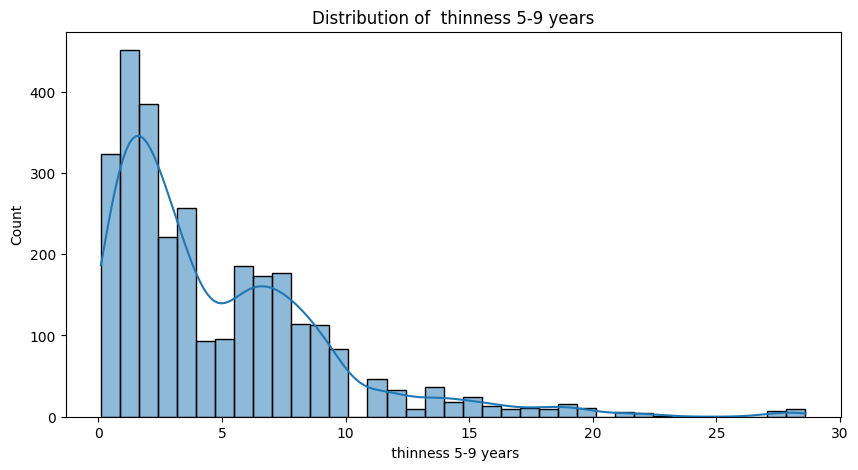

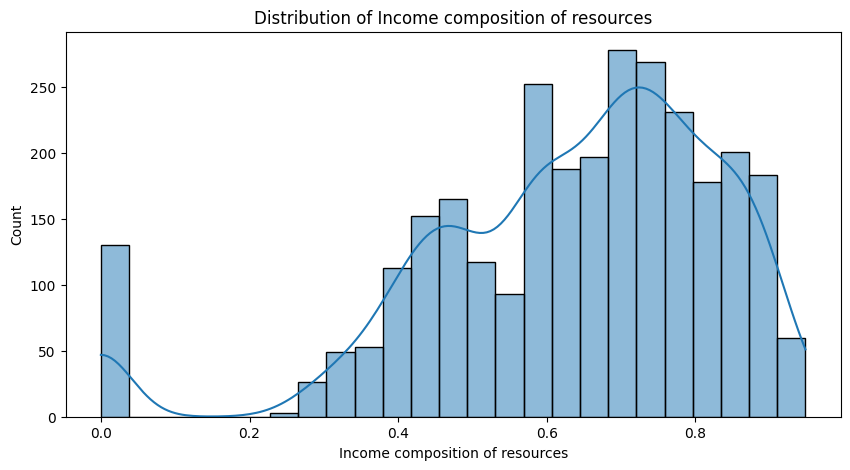

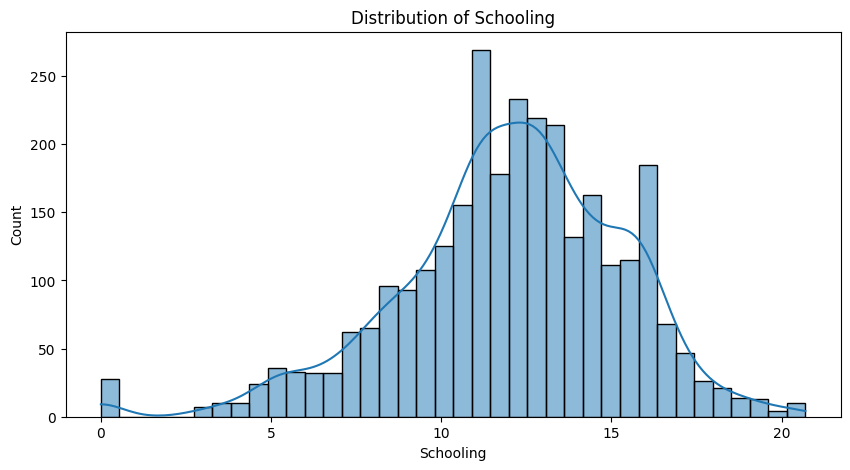

In [33]:
# plotting the distribution of numerical columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10,5))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


The features are not Normally Distributed , so the simple linear regression technique cannot be applied. The ensemble tree based techniques will be much more suitable to build the appropriate model.

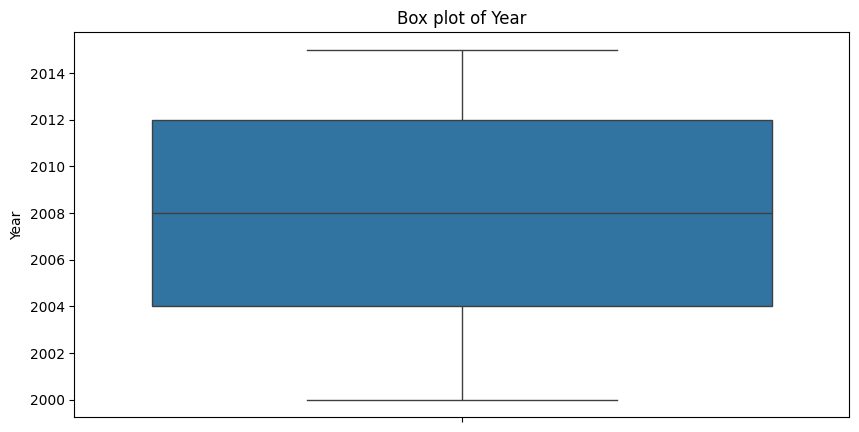

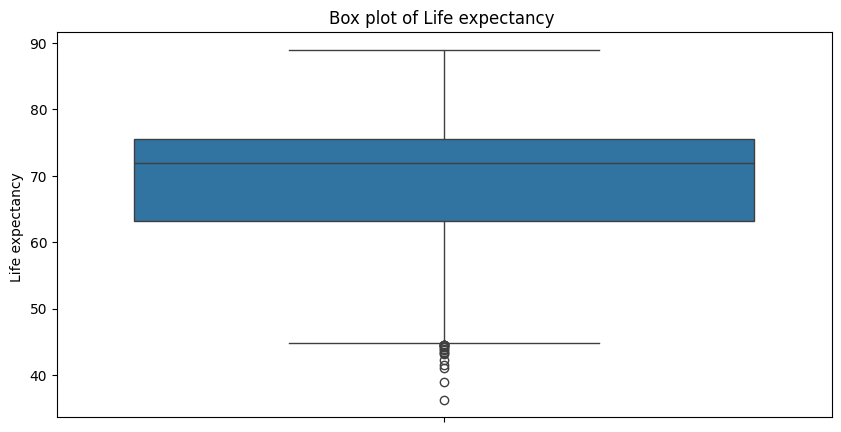

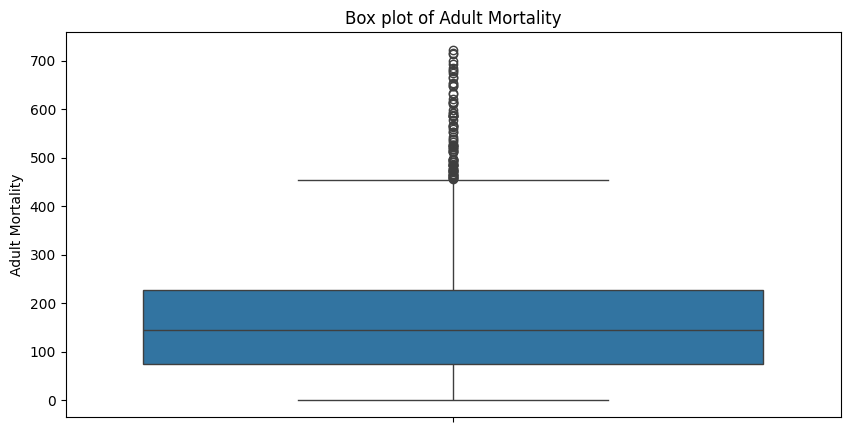

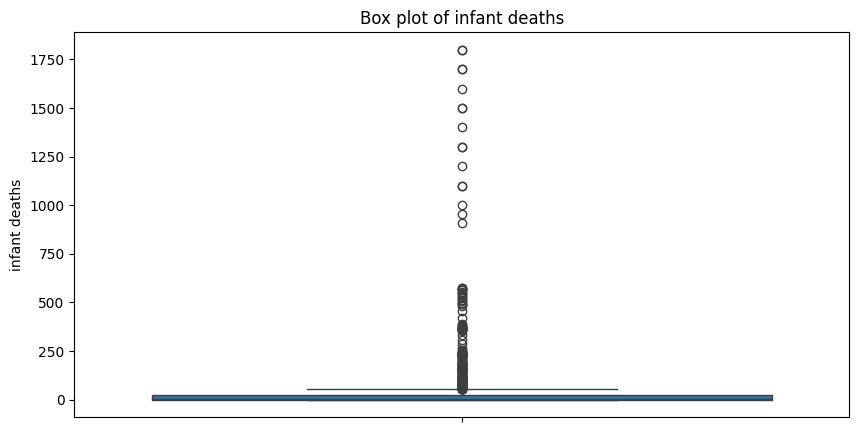

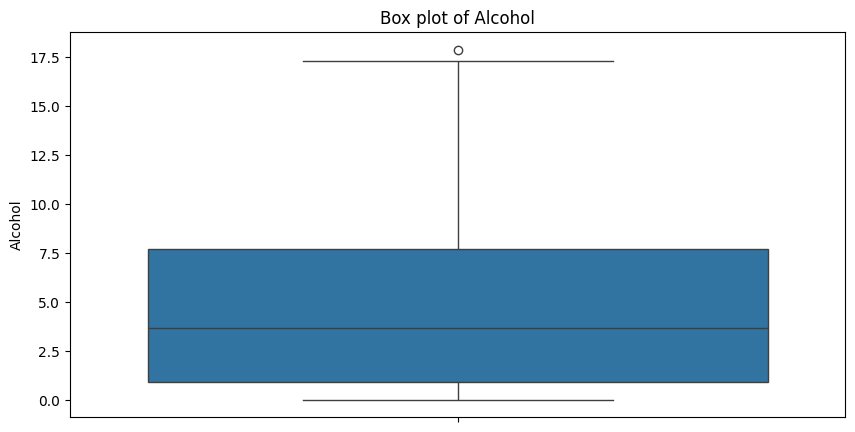

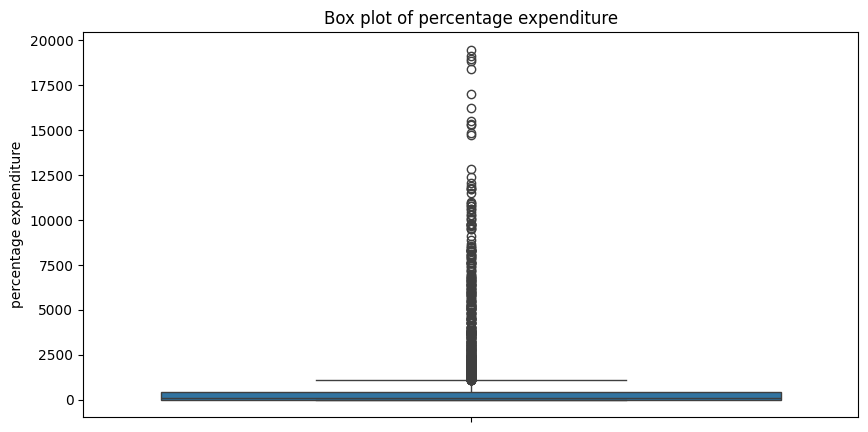

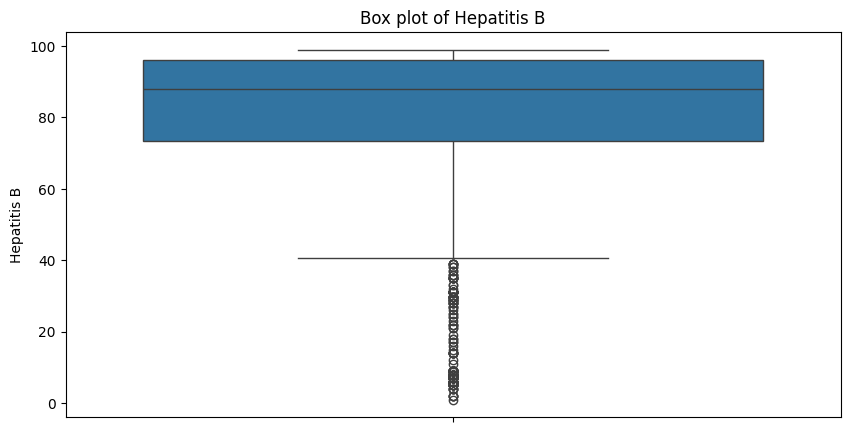

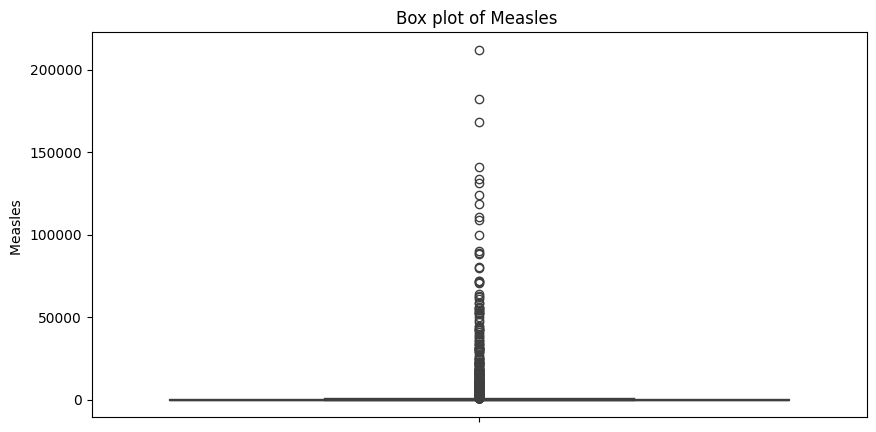

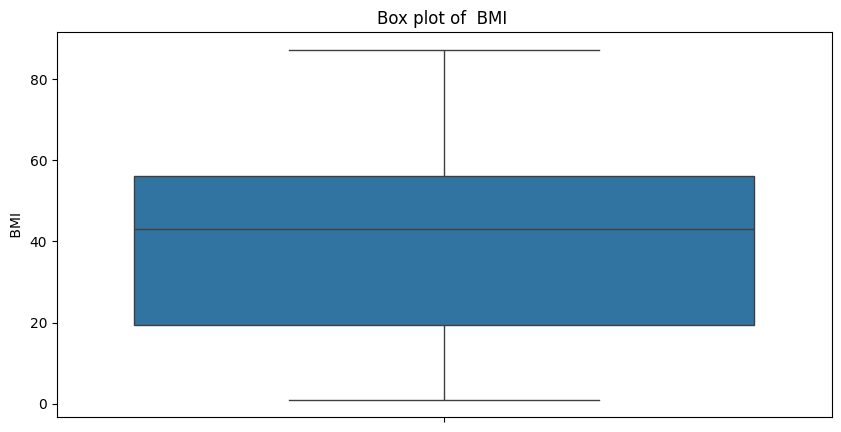

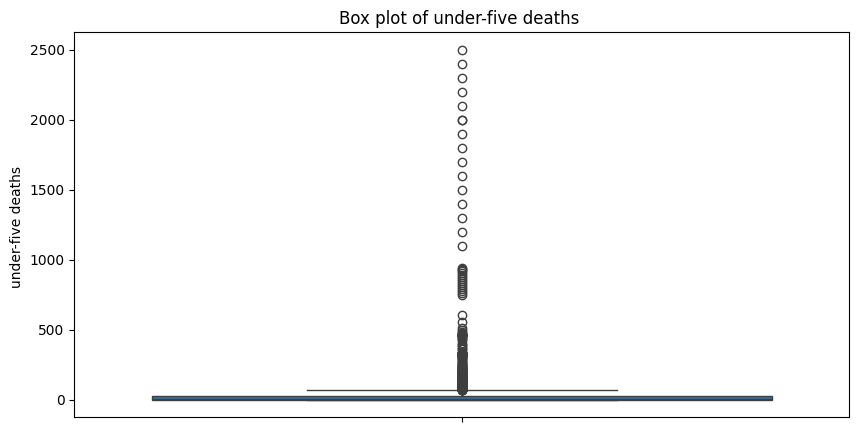

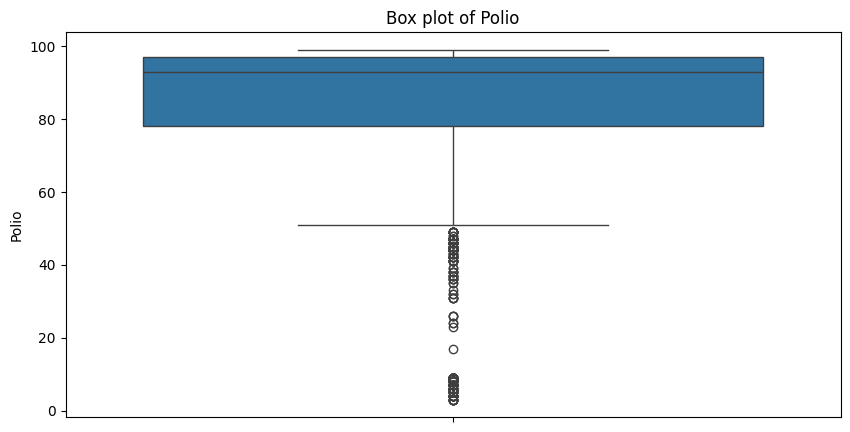

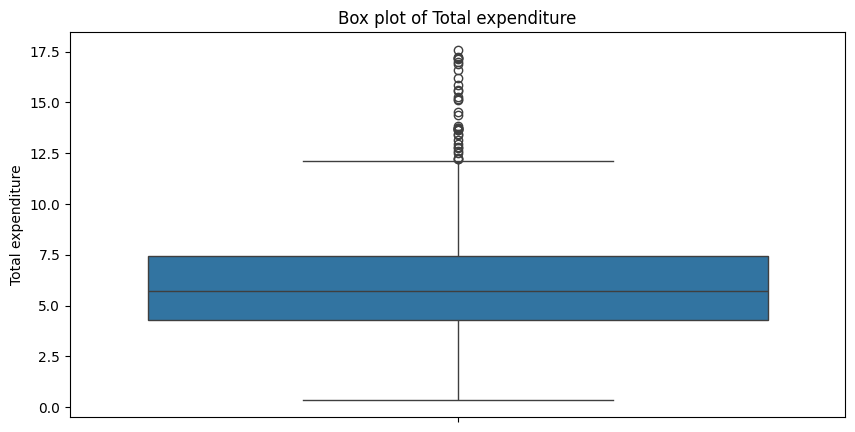

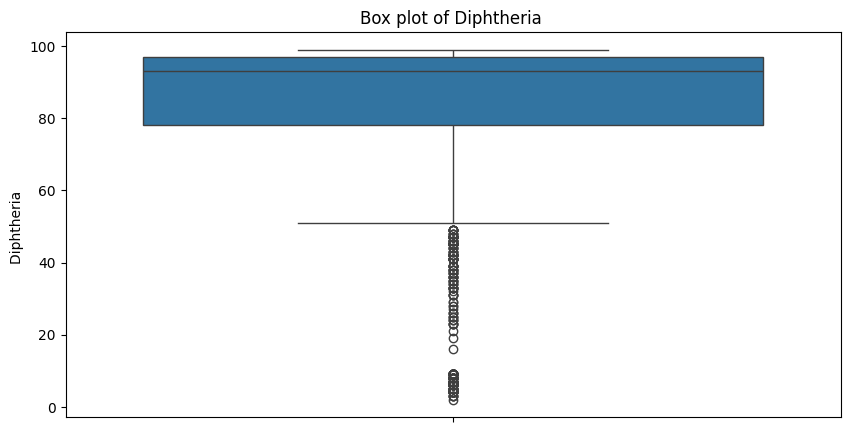

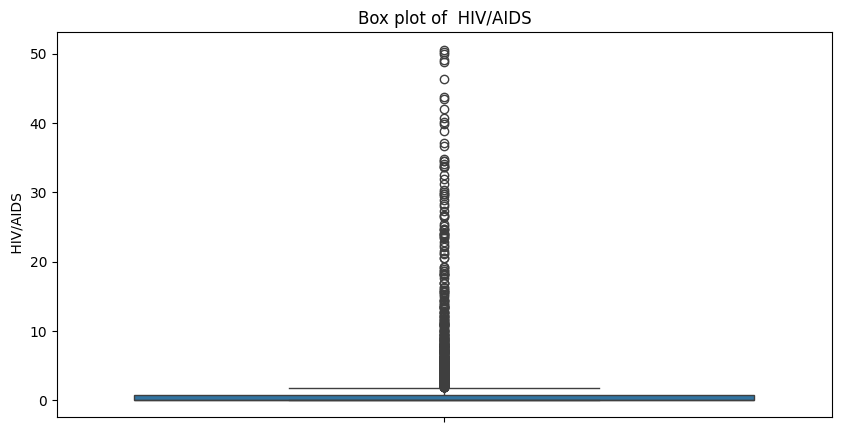

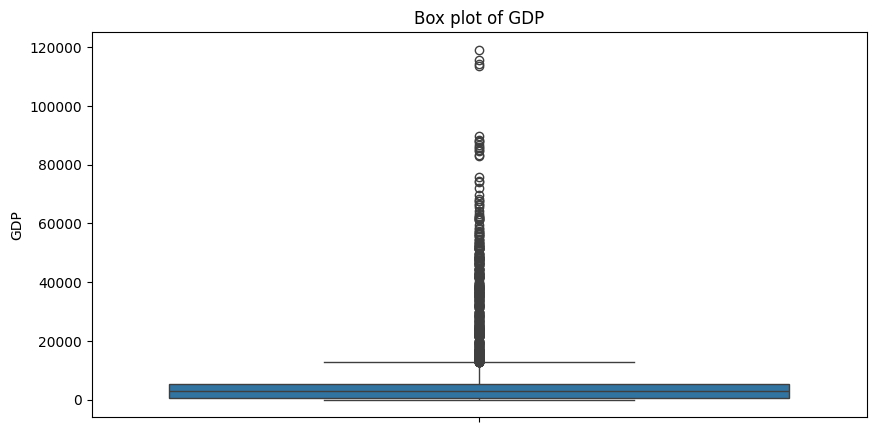

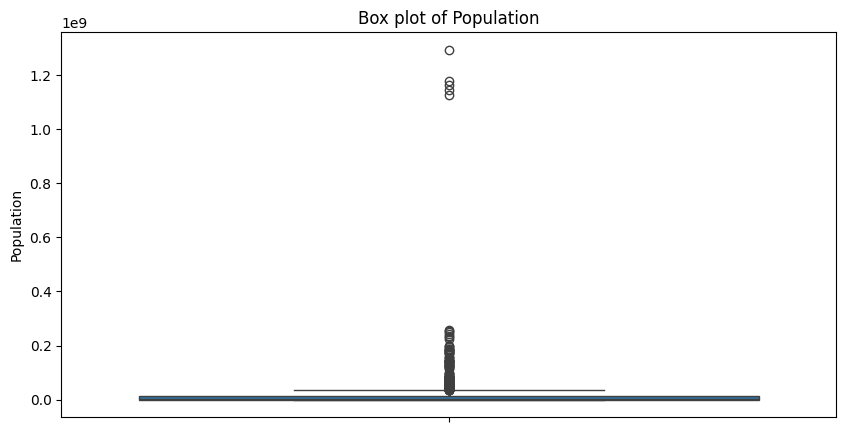

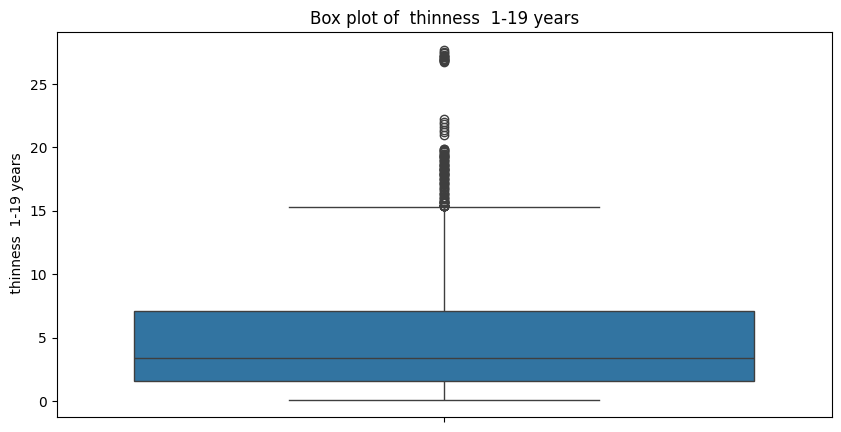

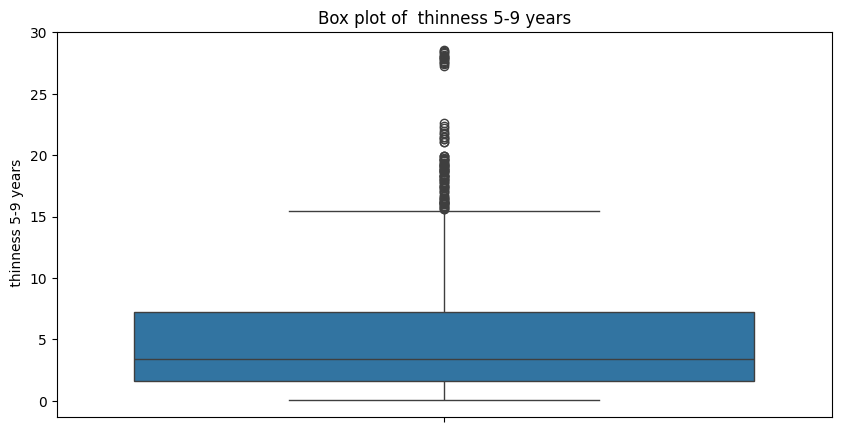

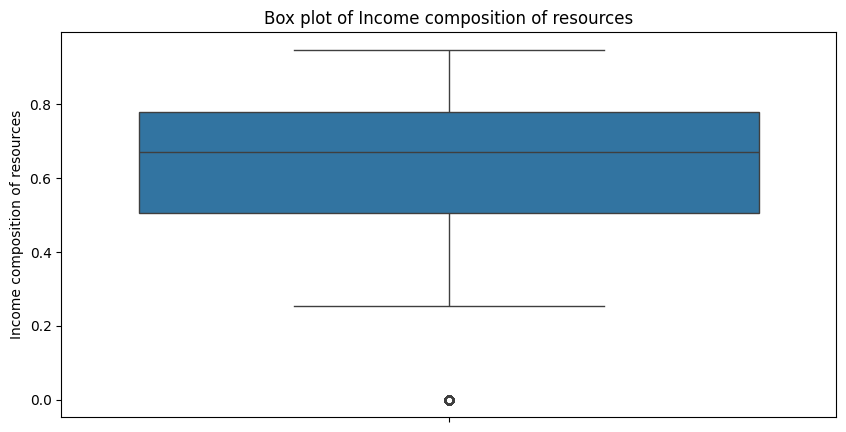

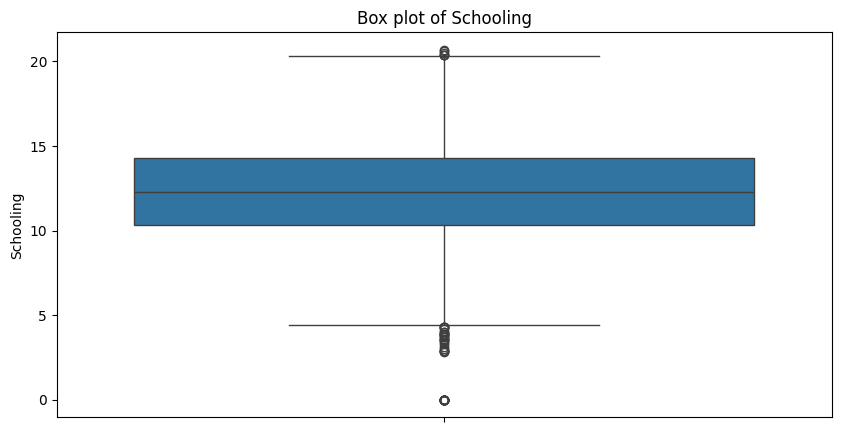

In [34]:
# Plotting box plot for each variable to check the position of outliers
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(df[col])
    plt.title(f"Box plot of {col}")
    plt.show()

### High number of outliers are observed in the variables which indicates that the features are not distributed well

# Feature Transformation



## Object Type Columns

In [35]:
df.select_dtypes(include=["object"]).columns

Index(['Country', 'Status'], dtype='object')

In [36]:
# Dropping the country column
df.drop("Country", axis=1, inplace=True)

In [37]:
# implementing one hot encoding to the status column
df["Status"].unique()

array(['Developing', 'Developed'], dtype=object)

In [38]:
# Assigning 0 to developing and 1 to developed
df["Status"] = df["Status"].map({"Developing":0, "Developed":1})

## Numerical columns

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   int64  
 2   Life expectancy                  2938 non-null   float64
 3   Adult Mortality                  2938 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2938 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2938 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2938 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2938 non-null   float64
 12  Total expenditure   

In [40]:
    # Dropping the year column
    df.drop("Year", axis=1, inplace=True)

## Converting the data into train and test

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop("Life expectancy ", axis=1)
y= df["Life expectancy "]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Model Building

In [56]:
# Importing the libraries XGB Regressor, Decision Tree Regressor, Random Forest Regressor, Gradient Boosting Regressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [57]:
# Creating a function to train and evaluate the model

def train_and_evaluate(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
    print(f"R2 Score: {r2_score(y_test, y_pred)}")

In [58]:
# Aplllying the function to the models
train_and_evaluate(XGBRegressor())
train_and_evaluate(DecisionTreeRegressor())
train_and_evaluate(RandomForestRegressor())
train_and_evaluate(GradientBoostingRegressor())

Mean Squared Error: 2.9599371498572826
Mean Absolute Error: 1.1486896079150593
R2 Score: 0.9658392957301534
Mean Squared Error: 6.734489795918368
Mean Absolute Error: 1.6149659863945576
R2 Score: 0.9222770948573149
Mean Squared Error: 2.6532075820678527
Mean Absolute Error: 1.0605731179889166
R2 Score: 0.9693792688868732
Mean Squared Error: 4.541896924704478
Mean Absolute Error: 1.5342535229560457
R2 Score: 0.9475818607579433


In [59]:
# Comparing the models in a dataframe
models = [XGBRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor()]
model_names = ["XGBRegressor", "DecisionTreeRegressor", "RandomForestRegressor", "GradientBoostingRegressor"]
mse = []
mae = []
r2 = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse.append(mean_squared_error(y_test, y_pred))
    mae.append(mean_absolute_error(y_test, y_pred))
    r2.append(r2_score(y_test, y_pred))

In [60]:
# Creating a dataframe
model_comparison = pd.DataFrame({"Model":model_names, "Mean Squared Error":mse, "Mean Absolute Error":mae, "R2 Score":r2})
model_comparison

,Model,Mean Squared Error,Mean Absolute Error,R2 Score
0,XGBRegressor,2.959937,1.148690,0.965839
1,DecisionTreeRegressor,6.841973,1.609184,0.921037
2,RandomForestRegressor,2.763648,1.069601,0.968105
3,GradientBoostingRegressor,4.538340,1.533415,0.947623


1. Best Model: RandomForestRegressor performs the best across all metrics.
2. Runner-Up: XGBRegressor is close and might be worth considering if interpretability or tuning ease is a priority.
3. The other models (DecisionTree and GradientBoosting) underperform compared to these two.

In [65]:
# Checking the performance of the deep learning model on the dataset
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


In [75]:
# Creating a deep learning model
model = Sequential()
model.add(Dense(128, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1))


c:\Users\Public\anaconda3\envs\lifeexpectancy\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [80]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss="mean_squared_error")

In [81]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)



Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 51.3885 - val_loss: 7.9128
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 52.3712 - val_loss: 8.1723
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 54.9451 - val_loss: 7.0334
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 49.8377 - val_loss: 7.2809
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 51.6628 - val_loss: 7.9907
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 56.3817 - val_loss: 8.7122
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 57.5838 - val_loss: 7.0889
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 55.3665 - val_loss: 7.4298
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 49.4187 - val_loss: 7.6604
Epoch 10/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 54.0456 - val_loss: 8.7262
Epoch 11/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 51.5326 - val_loss: 7.8224
Epoch 12/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 49.

In [82]:
from sklearn.metrics import mean_squared_error


In [83]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = (mean_squared_error(y_test, y_pred))
print("Mean Squared Error (RMSE):", mse)



19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Mean Squared Error (RMSE): 6.246864703911184


In [85]:
# Calculating the R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.9279047875140382
